In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler
import seaborn as sns
import pandas as pd
import sys
import os

path='/home/vmesle/Documents/Obsidian/Python/0-My_module'
sys.path.append(path)
from fct_math import regrpoly

# plt.style.use('seaborn-whitegrid')

%matplotlib inline

/home/vmesle/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
title = 'default internal resistance model of battery 1U'
monRepertoire = r'/home/virgil/Downloads/S-BAND/S-BAND TVAC'
rep_results = monRepertoire+r'/courbes'

In [ ]:
values = []

In [4]:
x = np.linspace(-40,60, 101)
dic = {
'R_bat_mOhm' : [i*20 for i in values]
}

In [14]:
x_lim = np.linspace(min(x), max(x))

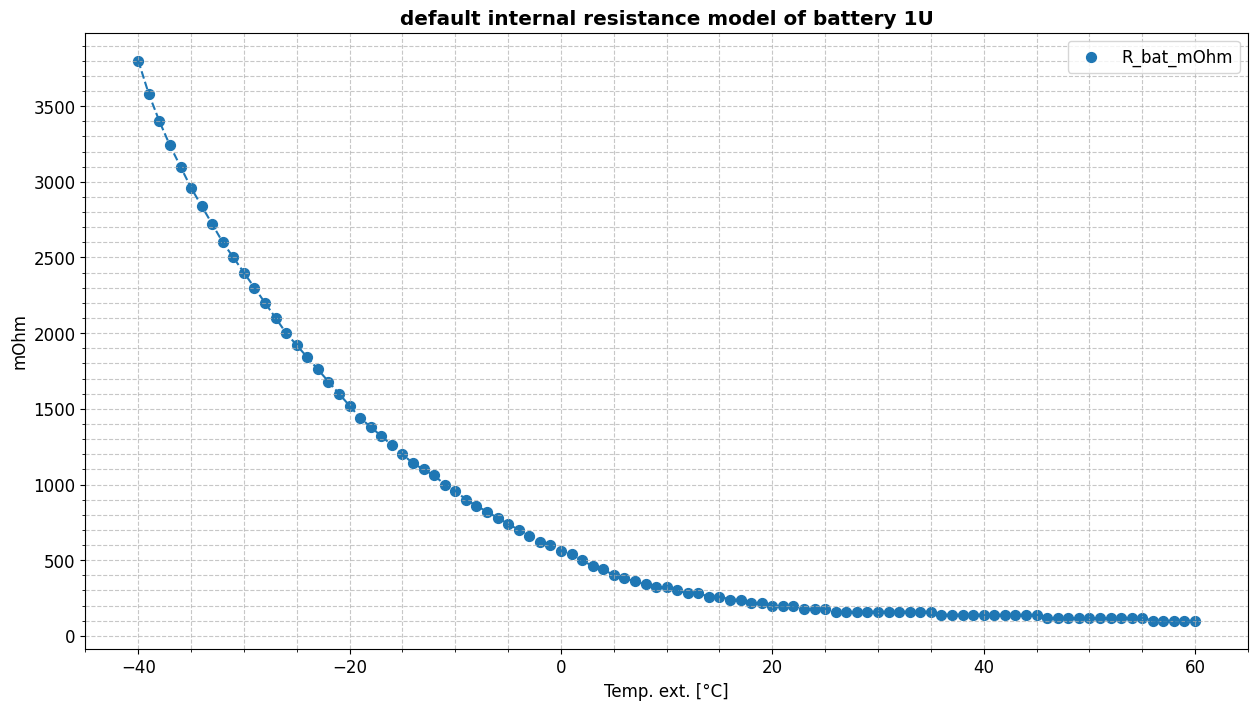

In [6]:
plt.rcParams["figure.figsize"] = [15,8]
plt.rcParams['font.size'] = '12'
# PLOT

# plt.plot(x_lim, p1(x_lim), c='k', linewidth = 1, alpha = 0.5, label='linear ' + R_linear)
# plt.plot(x_lim, p2(x_lim), '--', c='k' , alpha = 0.8 , label = 'quadratic ' + R_quadratic)

for i in dic :
    plt.scatter(x,dic[i], label=i, s=50)
    plt.plot(x,dic[i], ls = '--')

# plt.plot(x_lim, x_lim, 'k:')



# LEGEND
plt.legend(bbox_to_anchor=(1.05, 0.5, 0.3, 0.2), loc='upper left')
plt.legend(loc = 'best',ncol = 1)

plt.title(title, fontweight="bold")

# LABELS
plt.ylabel('mOhm')
plt.xlabel('Temp. ext. [°C]')

# GRILLES
plt.minorticks_on() #Grille mineure
plt.grid(True, which='both') 
plt.grid(alpha=0.7,which='both', linestyle='--')

# plt.savefig(rep_results + '\Curve_' + title + '.png', facecolor = 'white' ,bbox_inches='tight')

plt.show()

In [66]:
import pandas as pd
from datetime import timedelta

tps_plateaux = 8

# Exemple de liste de timedelta
timedelta_list = [
    timedelta(hours=1),
]                  

# Données pour le DataFrame


# Créer un DataFrame en utilisant la liste de timedelta comme index
df = pd.DataFrame(data, index=timedelta_list, columns=['values'])
df.index = df.index.astype('timedelta64[s]')
print(df)


        values
1 days      10
2 days      20
3 days      30
4 days      40
